# Ensemble of Public submission files

Credits:

* sub_1dcnn_15: https://www.kaggle.com/code/hugowjd/belka-1dcnn-with-all-data-15-folds-15-epoch
    * Inspired from: https://www.kaggle.com/code/ahmedelfazouan/belka-1dcnn-starter-with-all-data
* sub_auto: https://www.kaggle.com/code/mehrankazeminia/5-belka-submission-autogluon-frag1-2-3
    * sub_auto is the AutoGluon predictions instead of ensembled prediction of original notebook
    * The autoML frags are originated from: https://www.kaggle.com/code/motono0223/leash-bio-automl-baseline
* sub_xgb: https://www.kaggle.com/code/ricopue/leashbio-xgb-ecfp-10m-sample-rows
    * Some inspiration: https://www.kaggle.com/code/saurav9786/predictions-with-belka-xgboost-cv/notebook
* submission_knn: https://www.kaggle.com/code/mehrankazeminia/p-6-6-belka-competition-submission-knn

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leash-BELKA/sample_submission.csv
/kaggle/input/leash-BELKA/train.parquet
/kaggle/input/leash-BELKA/test.parquet
/kaggle/input/leash-BELKA/train.csv
/kaggle/input/leash-BELKA/test.csv
/kaggle/input/my-submission1/sub_knn.csv
/kaggle/input/my-submission1/sub_auto.csv
/kaggle/input/my-submission1/sub_xgb.csv
/kaggle/input/my-submission1/sub_1dcnn_15.csv


In [2]:
import pandas as pd

# sub_1dcnn = pd.read_csv('/kaggle/input/my-submission1/submission.csv')
sub_1dcnn = pd.read_csv('/kaggle/input/my-submission1/sub_1dcnn_15.csv')
sub_auto = pd.read_csv('/kaggle/input/my-submission1/sub_auto.csv')
sub_xgb = pd.read_csv("/kaggle/input/my-submission1/sub_xgb.csv")
sub_knn = pd.read_csv('/kaggle/input/my-submission1/sub_knn.csv')
sample_sub = pd.read_csv('/kaggle/input/leash-BELKA/sample_submission.csv')

In [3]:
weights = {
    'sub_1dcnn': 0.81,
    'sub_auto': 0.1,
    'sub_xgb': 0.06,
    'sub_knn': 0.03
}

# Merge the submissions using weighted average
submission_blend = (
    sub_1dcnn['binds'] * weights['sub_1dcnn'] +
    sub_auto['binds'] * weights['sub_auto'] +
    sub_xgb['binds']  * weights['sub_xgb'] +
    sub_knn['binds']  * weights['sub_knn']
)

sample_sub['binds']=submission_blend
sample_sub.to_csv('submission.csv', index=False)
sample_sub

,id,binds
0,295246830,0.047467
1,295246831,0.030683
2,295246832,0.019518
3,295246833,0.054094
4,295246834,0.036234
...,...,...
1674891,296921721,0.004544
1674892,296921722,0.004411
1674893,296921723,0.003535
1674894,296921724,0.008190


(0.0, 1.0)

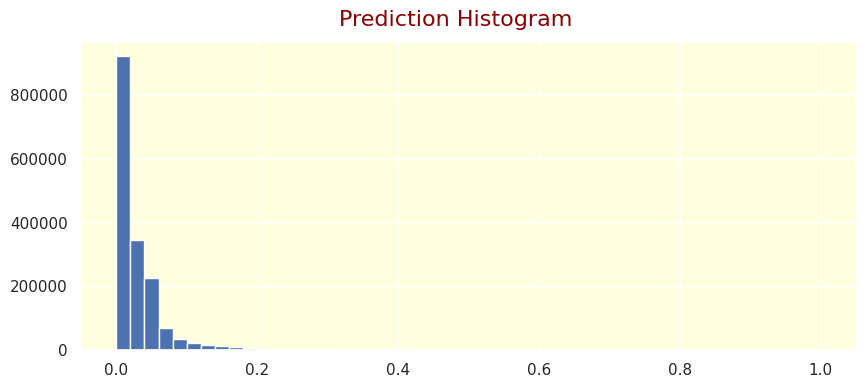

In [4]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set()
plt.figure(figsize=(10, 4))
plt.hist(sample_sub['binds'], bins=50, range=[0, 1])

plt.gca().set_facecolor('lightyellow')
plt.suptitle('Prediction Histogram', y=0.96, fontsize=16, c='darkred')

round(sample_sub['binds'].min(), 3), round(sample_sub['binds'].max(), 3)